Tutorial ma za zadanie pokazać klasyfikację 2 rodzajów obrazów przedstawiających auta sportowe oraz zwykłe. Zastosowano dwa podejścia: pierwsze, w którym
za podstawową bibliotekę robi biblioteka Tensorflow, za warstwę użytkową biblioteka Keras oraz drugie, gdzie zarówno za backendem jak i frontendm jest Pytorch.

Nim będzie można przystąpić do korzystania z tutoriala należy pobrać 2 foldery (training, validation) które zawierają po 2 podfoldery (zwykłe, sportowe) zdjęć samochodów oraz przerzucić je na swój dysk Google.


Po przerzuceniu zdjeć pierwszym krokiem jest zaimportowanie następujących bibliotek:

tensorflow - biblioteka wykorzystywana w procesach uczenia maszynowego oraz głębokich sieci neuronowych. Składa się z tzw. rozproszonego silnika wykonawczego oraz warstwy niższego API.

pytorch - inna biblioeka do tych samych celów

matplotlib - biblioteka do tworzenia wykresów dla języka programowania Python i jego rozszerzenia numerycznego NumPy

opencv - biblioteka funkcji wykorzystywanych podczas obróbki obrazu

os - biblioteka umożliwiająca wykonywanie operacji na plikach i folderach

cv2 (opencv) - służy do operacji na obrazch

numpy - biblioteka matematyczna umożliwiająca m. innymi operacje na macierzach

keras - wysokopoziomowe API wykorzystująca tensorflow jako backend

pathlib - biblioteka służąca do czytania ścieżek folderów oraz plików



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image #funkcje odpowiedzialna za augumentację
from tensorflow.keras.optimizers import RMSprop #algorytm służacy do optymalizacji malejącego współczynnika uczenia się

Foldery ze zdjęciami powinny znajdować się w połączonym z notatnikiem dyskiem google:

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Na początek przeprowadzone zostanie podejscie z wykorzystaniem bibliotek tensorflow oraz keras.

In [3]:
train = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)
validation= ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)

Wczytanie zawartości folderów training oraz validation

In [4]:
t_rain='/content/drive/MyDrive/TTSSN/auta_t_v/training'
v_alidation='/content/drive/MyDrive/TTSSN/auta_t_v/validation'

Zawartość folderów jest następnie wczytywana i tworzone są partie danych:

In [5]:
train_dataset=train.flow_from_directory(t_rain, #należy podać poprawną ścieżkę do folderu. Można ją znaleźć klikając Pliki->drive->MyDrive
                                        target_size=(200,200),
                                        batch_size = 3,
                                        class_mode = 'binary')
validation_dataset=train.flow_from_directory(v_alidation,
                                        target_size=(200,200),
                                        batch_size = 3,
                                        class_mode = 'binary')

Found 190 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Tworzenie modelu - to obiekt składający się z określonej liczby połączonych ze sobą warstw uczących z elementami treningu oraz wnioskowania

In [6]:
model = tf.keras.models.Sequential([

                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [7]:
tf.debugging.set_log_device_placement(True)


In [9]:

model.compile(loss='binary_crossentropy', #oblicza wielkość której model wymaga do minimalizacji w procesie treningu
              optimizer = RMSprop(learning_rate=0.001), # zapewnia przenośność średniej kwadratów gradientu oraz dzieli gradient przez pierwiastek tej średniej
              metrics=['accuracy']) #oblicza jak często predykcja odpowiada poprawnym wartościom

Kolejnym krokiem jest zdefiniowanie tzw. callbacks, to one pozwalają na określenie najlepszej możliwej precyzji w procesie uczenia oraz zachowanie najlepszych wag.

In [10]:
from keras.callbacks import ModelCheckpoint

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

Trening modelu składającego się z 60 epok, 4 kroków/epokę:

In [11]:
model_fit = model.fit(train_dataset,steps_per_epoch = 4,
                      epochs = 60,
                      validation_data = validation_dataset,
                      callbacks=[cp_callback])

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/60
4/4 [==============================] - ETA: 0s - loss: 0.7890 - accuracy: 0.4167
Epoch 1: val_loss improved from inf to 0.69318, saving model to training_1/cp.ckpt
4/4 [==============================] - 21s 3s/step - loss: 0.7890 - accuracy: 0.4167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/60
4/4 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.6000
Epoch 2: val_loss did not improve from 0.69318
4/4 [==============================] - 2s 651ms/step - loss: 0.6621 - accuracy: 0.6000 - val_loss: 1.0071 - val_accuracy: 0.5000
Epoch 3/60
4/4 [==============================] - ETA: 0s - loss: 0.9928 - accuracy: 0.5833
Epoch 3: val_loss did not improve from 0.69318
4/4 [==============================] - 2s 551ms/step - loss: 0.9928 - accuracy: 0.5833 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 4/60
4/4 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.5833
Epoch 4: val_loss did not improve from 0.69318
4/4 [==================

Do predykcji wybierana jest epoka z najlepszymi wagami:

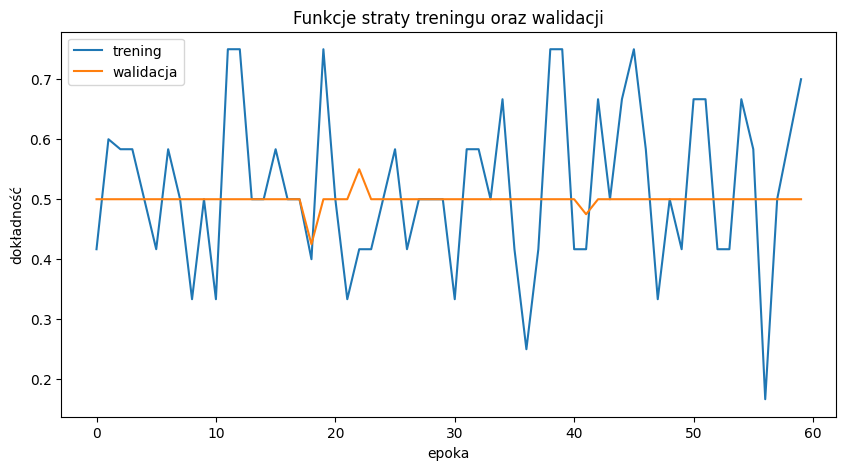

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title("Funkcje straty treningu oraz walidacji")
plt.ylabel('dokładność')
plt.xlabel('epoka')
plt.legend(['trening', 'walidacja'], loc='upper left')
plt.show()

Mapowanie klas obietów z ich nazwami:

In [13]:
validation_dataset.class_indices

{'sportowe': 0, 'zwykle': 1}

Końcowy etap klasyfikacji - w tym momencie należy wybrać obrazy przedstawiające auta w formacie .jpg (sportowe bądź nie) i wrzucić je z komputera na serwer. Może być kilka, zostaną one sklasyfikowane i odpowiednio nazwane. Czasami zdarza się, że w przypadku niektórych rozmiarów klasyfikacja będzie niewłaściwa, wtedy należy załadować zdjęcie w innym rozmiarze:


In [ ]:
from google.colab import files
uploads = files.upload()

Saving auto.jpeg to auto.jpeg


Wizualizacja danych - dla wszystkich wrzuconych zdjęć za pomocą fukcji z bibliotek matplotlib, image oraz numpy zdjęcie jest konwertowane na tablice, rozbudowywane o kolejne wierzchołki dodaje do tablicy kolejny wierzchołek który znajdzie się w miejscu wierchołka powiększonego kształtu tablicy oraz następnie łączy powstałe tablice oraz dokonuje ostatecznej predykcji:

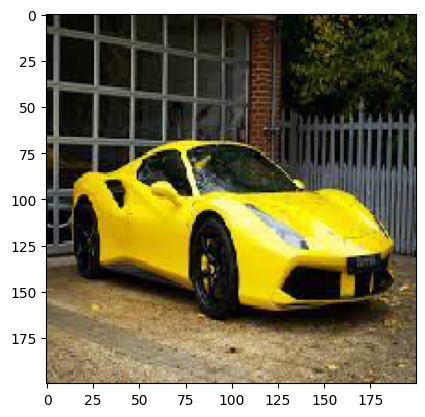

AttributeError: ignored

In [38]:
for file in uploads.keys():
  src = cv2.imread(file, cv2.IMREAD_UNCHANGED)
  imgo = cv2.resize(src,(128,128))
  imgo = image.load_img(file ,target_size=(200,200))
  plt.imshow(imgo)
  plt.show()

  X = image.img_to_array(imgo)
  X = np.expand_dims(X,axis =0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 1:
    print("              zwykłe")
  if val == 0:
    print("              sportowe")

Biblioteka Pytorch istotnie różni się od biblioteki tensorflow. Jedną z róznic istotniejszych jest to, że dobrze spełnia się w roli back- jak i frontendu.

Pierwszym krokiem jest zaimporowanie bibliotek odpowiedzialnych za pracę z biblioteką:

In [14]:
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

Odpowiednik funkcji ImageDataGenerator (odpowiada za augumentację):




In [15]:
transformer=transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

Odpowiednik funkcji flow_from_directory:

In [16]:
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(t_rain,transform=transformer),
    batch_size=64, shuffle=True
)
valid_loader=DataLoader(
    torchvision.datasets.ImageFolder(v_alidation,transform=transformer),
    batch_size=64, shuffle=True
)

Mapowanie klas:

In [17]:
root=pathlib.Path(t_rain)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

Sprawdzanie, czy istnieje wsparcie GPU:

In [20]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Nazwy klas:

In [21]:
print(classes)

['sportowe', 'zwykle']


Definicja klasy reprezentującej sieć neuronową:

In [22]:
class s_neuronowa(nn.Module):
    def __init__(self,num_classes=2):
        super(s_neuronowa,self).__init__()

        #rozmiar wejścia= (256,3,150,150)

        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)

        self.bn1=nn.BatchNorm2d(num_features=12)

        self.relu1=nn.ReLU()


        self.pool=nn.MaxPool2d(kernel_size=2)



        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)

        self.relu2=nn.ReLU()




        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)

        self.bn3=nn.BatchNorm2d(num_features=32)

        self.relu3=nn.ReLU()


        #rozmiar zdjęcia jest celowo pomniejszany, by usprawnić proces uczenia
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)

        output=self.pool(output)

        output=self.conv2(output)
        output=self.relu2(output)

        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)


         #rozmiary obrazu na wyjściu = (256,32,75,75)

        output=output.view(-1,32*75*75)


        output=self.fc(output)

        return output

In [23]:
model=s_neuronowa(num_classes=2).to(device)

Determinowanie funkcji straty dla powstałego modelu:

In [24]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [25]:
train_count=len(glob.glob(t_rain+'/**/*.jpg'))
valid_count=len(glob.glob(v_alidation+'/**/*.jpg'))

Sprawdzenie, czy liczba wczytanych zdjęć się zgadza

In [26]:
print(train_count,valid_count)

190 40


In [28]:
import matplotlib.pyplot as plt
val_losses = []
train_losses = []

Trening - w odróżnieniu od Tensorflow należy zdefiniować dokładnie proces treningu, nie wystarczy do tego jedna funkcja:

In [29]:
best_accuracy=0.0
epo=60
for epoch in range(epo):

    #Obliczenia na zasobach treningowych
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        optimizer.zero_grad()

        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()


        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)

        train_accuracy+=int(torch.sum(prediction==labels.data))

    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count


    # Obliczenia na zasobach walidacyjnych
    model.eval()

    valid_accuracy=0.0
    for i, (images,labels) in enumerate(valid_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        valid_accuracy+=int(torch.sum(prediction==labels.data))

    valid_accuracy=valid_accuracy/valid_count

    import matplotlib.pyplot as plt


    val_losses.append(valid_accuracy)
    train_losses.append(train_accuracy)


    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(valid_accuracy))

    #Save the best model
    if valid_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=valid_accuracy

Epoch: 0 Train Loss: tensor(27.8111) Train Accuracy: 0.47368421052631576 Test Accuracy: 0.675
Epoch: 1 Train Loss: tensor(9.3252) Train Accuracy: 0.7 Test Accuracy: 0.575
Epoch: 2 Train Loss: tensor(10.1786) Train Accuracy: 0.7 Test Accuracy: 0.725
Epoch: 3 Train Loss: tensor(7.3218) Train Accuracy: 0.6684210526315789 Test Accuracy: 0.725
Epoch: 4 Train Loss: tensor(7.1670) Train Accuracy: 0.6684210526315789 Test Accuracy: 0.65
Epoch: 5 Train Loss: tensor(5.6861) Train Accuracy: 0.7210526315789474 Test Accuracy: 0.6
Epoch: 6 Train Loss: tensor(3.6775) Train Accuracy: 0.7 Test Accuracy: 0.575
Epoch: 7 Train Loss: tensor(3.7232) Train Accuracy: 0.6105263157894737 Test Accuracy: 0.6
Epoch: 8 Train Loss: tensor(3.7107) Train Accuracy: 0.6631578947368421 Test Accuracy: 0.55
Epoch: 9 Train Loss: tensor(3.1947) Train Accuracy: 0.7263157894736842 Test Accuracy: 0.55
Epoch: 10 Train Loss: tensor(3.8499) Train Accuracy: 0.7315789473684211 Test Accuracy: 0.65
Epoch: 11 Train Loss: tensor(3.7911) 

Poniższy wykres pokazuje proces treningu:

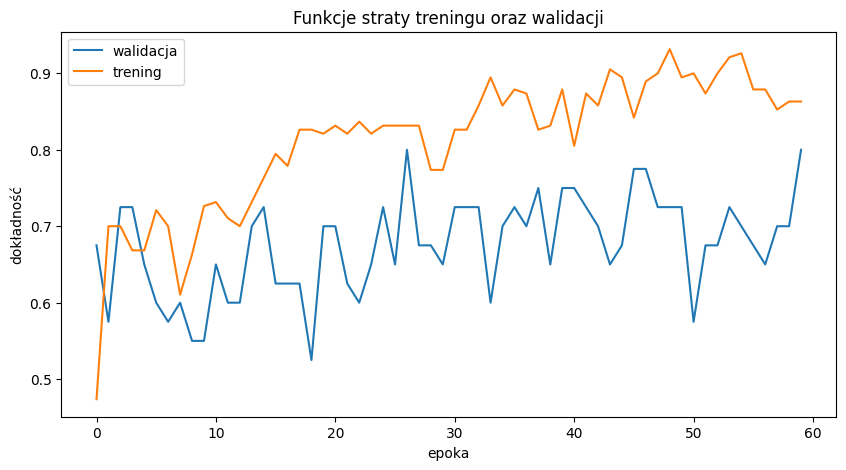

In [30]:
plt.figure(figsize=(10,5))
plt.title("Funkcje straty treningu oraz walidacji")
plt.plot(val_losses,label="walidacja")
plt.plot(train_losses,label="trening")
plt.ylabel('dokładność')
plt.xlabel('epoka')
plt.legend()
plt.show()

Ładowanie najlepszego modelu:

In [31]:
checkpoint=torch.load('best_checkpoint.model')
model=s_neuronowa(num_classes=2)
model.load_state_dict(checkpoint)
model.eval()

s_neuronowa(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=2, bias=True)
)

Z biblioteki PIL importujemy moduł Image, który umożliwia pracę ze zdjęciami:



In [32]:
from PIL import Image

W odróżnieniu od tensorflow należy zdefiniować funkcję predykcji:

In [35]:
def prediction(img_path,transformer):

    image=Image.open(img_path)
    i_tensor=transformer(image).float()
    i_tensor=i_tensor.unsqueeze_(0)
    input=Variable(i_tensor)


    output=model(input)

    index=output.data.numpy().argmax()

    p=classes[index]
    return p

Mozliwość wczytania dowlonego zdjęcia w formacie.jpg w celu predykcji:

In [37]:
from google.colab import files
uploads = files.upload()

Saving auto.jpeg to auto.jpeg


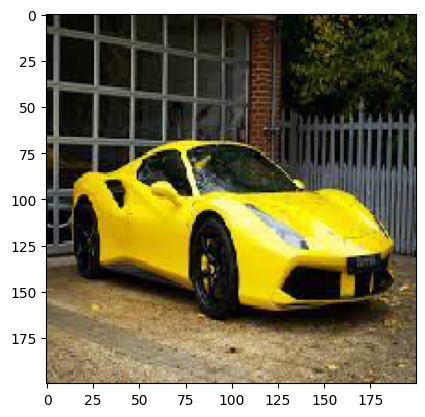

               sportowe


In [43]:
for file in uploads.keys():
  src = cv2.imread(file, cv2.IMREAD_UNCHANGED)
  imgo = cv2.resize(src,(128,128))
  imgo = image.load_img(file ,target_size=(200,200))
  plt.imshow(imgo)
  plt.show()

for i in images_path:
    print("              ",prediction(i,transformer))

Podsumowując, w obu przypadkach etapy ładowania, augumentacji oraz mapowania danych przebiega podobnie. W przypadku augumentacji jak i definicji samych modeli uczących biblioteki oferują dosyć różniące się od siebie możliwości, nie da się odzwierciedlić wzajemnie w obu przypadkach.

Biblioteka Tensorflow bardziej przydatna jest w momencie, kiedy potrzebny jest wybór warstwy front-endowej która to dopiero umożliwia łatwe zdefiniowanie modelu. Biblioteka PyTorch zawiera w sobie dwie warstwy, jednakże pozbawiona jest gotowych funkcji odpowiedzialnych za trening.

Oprócz tego skuteczność klasyfikacji nie jest związana ze specyfiką biblioteki, lecz zależna jest zależna od użytej augumentacji, zdefiniowania sieci oraz samych warstw.